In [80]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [82]:
X.isnull()

,buying,maint,doors,persons,lug_boot,safety
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1723,False,False,False,False,False,False
1724,False,False,False,False,False,False
1725,False,False,False,False,False,False
1726,False,False,False,False,False,False


In [83]:
y.isnull()

,class
0,False
1,False
2,False
3,False
4,False
...,...
1723,False
1724,False
1725,False
1726,False


In [84]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [85]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [86]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [87]:
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame
df_new = df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to each specified column
for column in ['buying',	'maint',	'doors',	'persons',	'lug_boot',	'safety',	'class']:
    df_new[column] = label_encoder.fit_transform(df_new[column])

df_new

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [88]:
df_new.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [89]:
y = df_new['class']
X = df_new.drop(columns=['class'])

Yarr = y.to_numpy()
Xarr = X.to_numpy()

print("Shape of Y:", Yarr.shape)
print("Shape of X:", Xarr.shape)

Shape of Y: (1728,)
Shape of X: (1728, 6)


In [90]:
import numpy as np

def shuffle_and_split_data(X, Y, test_ratio, val_ratio):
    # Shuffle indices
    shuffled_indices = np.random.permutation(len(X))
    
    # Calculate the sizes for test and validation sets
    test_set_size = int(len(X) * test_ratio)
    val_set_size = int(len(X) * val_ratio)
    
    # Get indices for each set
    test_indices = shuffled_indices[:test_set_size]
    val_indices = shuffled_indices[test_set_size:test_set_size + val_set_size]
    train_indices = shuffled_indices[test_set_size + val_set_size:]
    
    # Split the data
    return (X[train_indices], X[val_indices], X[test_indices], 
            Y[train_indices], Y[val_indices], Y[test_indices])

In [91]:
Xtrain_set, Xval_set, Xtest_set, Ytrain_set, Yval_set, Ytest_set = shuffle_and_split_data(Xarr, Yarr, test_ratio=0.15, val_ratio=0.15)

In [100]:
print("Shape of Xtrain_set:", Xtrain_set.shape)
print("Shape of Ytrain_set:", Ytrain_set.shape)

Shape of Xtrain_set: (1210, 6)
Shape of Ytrain_set: (1210,)


In [92]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier ,plot_tree
import matplotlib.pyplot as plt

In [93]:
clf = DecisionTreeClassifier(max_depth=5,random_state=42)

In [94]:
clf.fit(Xtrain_set,Ytrain_set)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [95]:
y_val_pred = clf.predict(Xval_set)

In [96]:
def manual_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

In [97]:
val_accuracy_dt= manual_accuracy(Yval_set, y_val_pred)
print("Validation Accuracy (Manual):", val_accuracy_dt)

Validation Accuracy (Manual): 0.8494208494208494


In [98]:
y_test_pred = clf.predict(Xtest_set)
test_accuracy_dt = manual_accuracy(Ytest_set, y_test_pred)
print("Test Accuracy (Manual):", test_accuracy_dt)

Test Accuracy (Manual): 0.8185328185328186


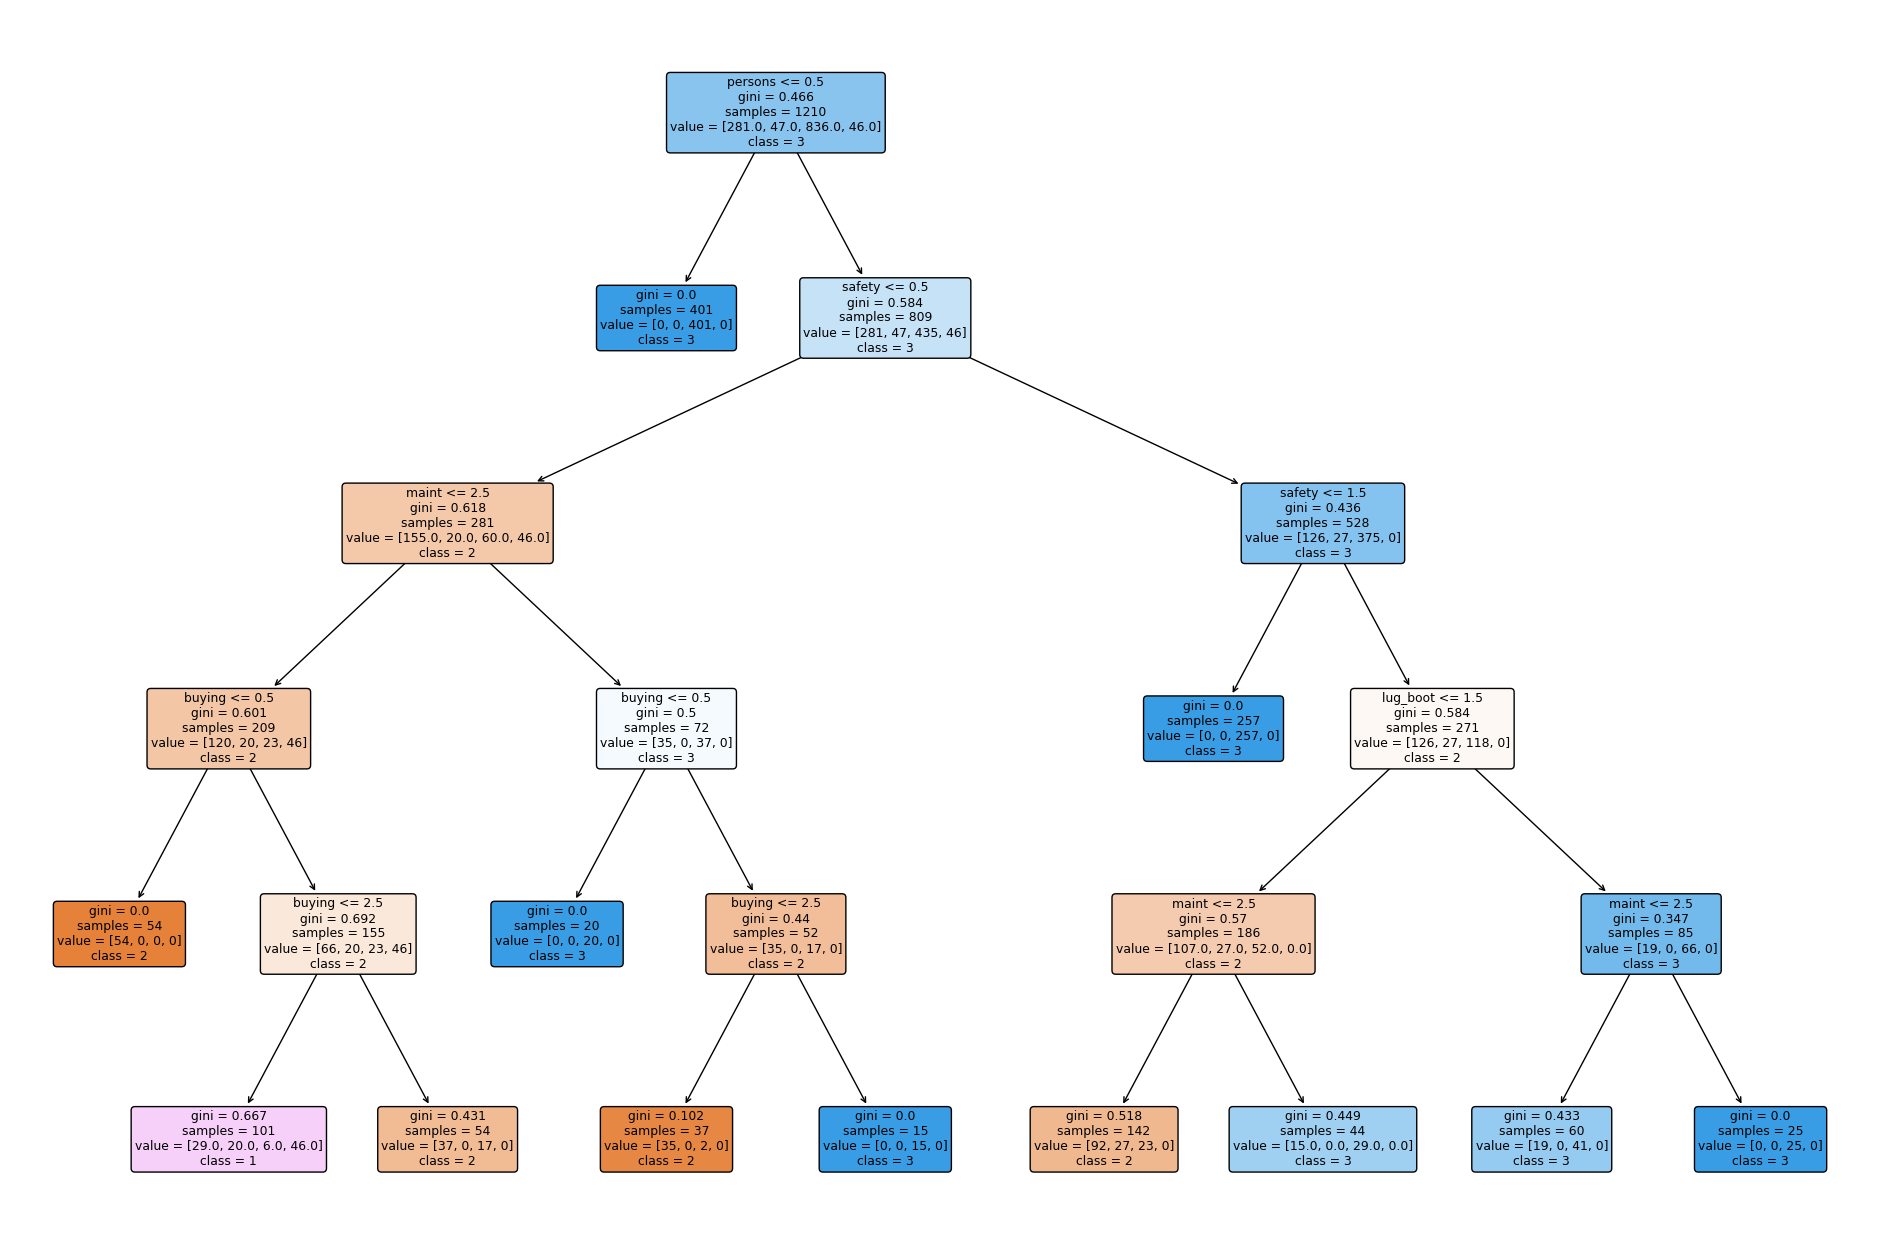

In [101]:
plt.figure(figsize=(24,16))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(x) for x in y.unique()], rounded=True)
plt.show()